# SI671 Final Project Model Development

In [1]:
#import packages
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import 2017 data into pandas
sqf_17 = pd.read_excel('data/sqf-2017.xlsx')
#import 2018 data into pandas
sqf_18 = pd.read_excel('data/sqf-2018.xlsx')

#combine both dataframes
sqf=sqf_17.append(sqf_18, ignore_index=True)

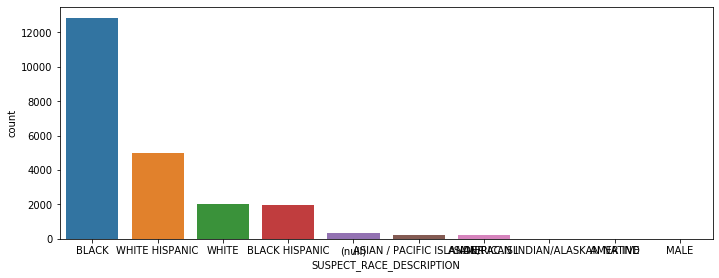

In [57]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 4.27)
sns.countplot(x='SUSPECT_RACE_DESCRIPTION',  order = sqf['SUSPECT_RACE_DESCRIPTION'].value_counts().index, data=sqf)

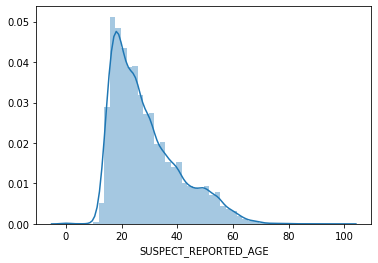

In [3]:
ax=sns.distplot(sqf[sqf['SUSPECT_REPORTED_AGE']!='(null)']['SUSPECT_REPORTED_AGE'])

In [4]:
attributes=['SUSPECT_BODY_BUILD_TYPE', 'SUSPECT_RACE_DESCRIPTION', 'SUSPECT_REPORTED_AGE','SUSPECT_SEX','DEMEANOR_OF_PERSON_STOPPED','FRISKED_FLAG','SEARCHED_FLAG','WEAPON_FOUND_FLAG','SUSPECT_ARRESTED_FLAG','ISSUING_OFFICER_RANK','FIREARM_FLAG','KNIFE_CUTTER_FLAG','OBSERVED_DURATION_MINUTES','STOP_DURATION_MINUTES','STOP_LOCATION_BORO_NAME','SUMMONS_ISSUED_FLAG','SUSPECTED_CRIME_DESCRIPTION', 'PHYSICAL_FORCE_CEW_FLAG', 'PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG', 'PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG', 'PHYSICAL_FORCE_OC_SPRAY_USED_FLAG', 'PHYSICAL_FORCE_RESTRAINT_USED_FLAG']

In [5]:
#keep desired columns for the model
df=sqf[attributes]

In [6]:
df_clean=pd.DataFrame()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22637 entries, 0 to 22636
Data columns (total 22 columns):
SUSPECT_BODY_BUILD_TYPE                   22637 non-null object
SUSPECT_RACE_DESCRIPTION                  22637 non-null object
SUSPECT_REPORTED_AGE                      22637 non-null object
SUSPECT_SEX                               22637 non-null object
DEMEANOR_OF_PERSON_STOPPED                21484 non-null object
FRISKED_FLAG                              22637 non-null object
SEARCHED_FLAG                             22637 non-null object
WEAPON_FOUND_FLAG                         22637 non-null object
SUSPECT_ARRESTED_FLAG                     22637 non-null object
ISSUING_OFFICER_RANK                      22637 non-null object
FIREARM_FLAG                              22637 non-null object
KNIFE_CUTTER_FLAG                         22637 non-null object
OBSERVED_DURATION_MINUTES                 22637 non-null int64
STOP_DURATION_MINUTES                     22637 non-null int

In [7]:
#change each row to a categorical value for machine learning 
df['SUSPECT_BODY_BUILD_TYPE'] = df['SUSPECT_BODY_BUILD_TYPE'].astype('category')
df_clean['build'] = df['SUSPECT_BODY_BUILD_TYPE'].cat.codes

df['SUSPECT_RACE_DESCRIPTION'] = df['SUSPECT_RACE_DESCRIPTION'].astype('category')
df_clean['race'] = df['SUSPECT_RACE_DESCRIPTION'].cat.codes

df['SUSPECT_SEX'] = df['SUSPECT_SEX'].astype('category')
df_clean['sex'] = df['SUSPECT_SEX'].cat.codes

df['DEMEANOR_OF_PERSON_STOPPED'] = df['DEMEANOR_OF_PERSON_STOPPED'].astype('category')
df_clean['demeanor'] = df['DEMEANOR_OF_PERSON_STOPPED'].cat.codes

df['FRISKED_FLAG'] = df['FRISKED_FLAG'].astype('category')
df_clean['frisked'] = df['FRISKED_FLAG'].cat.codes

df['SEARCHED_FLAG'] = df['SEARCHED_FLAG'].astype('category')
df_clean['searched'] = df['SEARCHED_FLAG'].cat.codes

df['FIREARM_FLAG'] = df['FIREARM_FLAG'].astype('category')
df_clean['firearm_sus'] = df['FIREARM_FLAG'].cat.codes

df['WEAPON_FOUND_FLAG'] = df['WEAPON_FOUND_FLAG'].astype('category')
df_clean['weapon_found'] = df['WEAPON_FOUND_FLAG'].cat.codes

df['ISSUING_OFFICER_RANK'] = df['ISSUING_OFFICER_RANK'].astype('category')
df_clean['officer_rank'] = df['ISSUING_OFFICER_RANK'].cat.codes

df['KNIFE_CUTTER_FLAG'] = df['KNIFE_CUTTER_FLAG'].astype('category')
df_clean['knife_sus'] = df['KNIFE_CUTTER_FLAG'].cat.codes

df['STOP_LOCATION_BORO_NAME'] = df['STOP_LOCATION_BORO_NAME'].astype('category')
df_clean['boro'] = df['STOP_LOCATION_BORO_NAME'].cat.codes

df['SUSPECTED_CRIME_DESCRIPTION'] = df['SUSPECTED_CRIME_DESCRIPTION'].astype('category')
df_clean['crime_sus'] = df['SUSPECTED_CRIME_DESCRIPTION'].cat.codes

df['PHYSICAL_FORCE_CEW_FLAG'] = df['PHYSICAL_FORCE_CEW_FLAG'].astype('category')
df_clean['phy_cew'] = df['PHYSICAL_FORCE_CEW_FLAG'].cat.codes

df['PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG'] = df['PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG'].astype('category')
df_clean['draw_weapon'] = df['PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG'].cat.codes

df['PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG'] = df['PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG'].astype('category')
df_clean['handcuff'] = df['PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG'].cat.codes

df['PHYSICAL_FORCE_OC_SPRAY_USED_FLAG'] = df['PHYSICAL_FORCE_OC_SPRAY_USED_FLAG'].astype('category')
df_clean['oc_spray'] = df['PHYSICAL_FORCE_OC_SPRAY_USED_FLAG'].cat.codes

df['PHYSICAL_FORCE_RESTRAINT_USED_FLAG'] = df['PHYSICAL_FORCE_RESTRAINT_USED_FLAG'].astype('category')
df_clean['restraint'] = df['PHYSICAL_FORCE_RESTRAINT_USED_FLAG'].cat.codes

In [8]:
df['SUSPECT_REPORTED_AGE'].replace('(null)', 0,inplace=True)
df_clean['age']=df['SUSPECT_REPORTED_AGE']
df_clean['obs_min']=df['OBSERVED_DURATION_MINUTES']
df_clean['stop_min']=df['STOP_DURATION_MINUTES']

In [39]:
df_clean.head()

,build,race,sex,demeanor,frisked,searched,firearm_sus,weapon_found,officer_rank,knife_sus,boro,crime_sus,phy_cew,draw_weapon,handcuff,oc_spray,restraint,age,obs_min,stop_min
0,12,0,6,1896,0,1,0,1,13,0,10,27,0,0,0,0,0,39,10,90
1,10,0,6,1896,0,1,0,1,13,0,10,27,0,0,0,0,0,37,10,90
2,12,8,5,1535,0,1,0,1,11,0,10,21,0,0,0,0,0,0,1,40
3,13,6,6,864,2,2,0,1,11,0,10,15,0,0,1,0,0,31,2,40
4,12,5,5,313,0,1,0,1,11,0,10,2,0,0,1,0,0,0,1,60


In [9]:
#remove a null weapon found rows
df_clean=df_clean[df_clean.weapon_found != 0]

In [10]:
#create test train spilt
from sklearn.model_selection import train_test_split
y=df_clean['weapon_found']
x=df_clean.drop(columns=['weapon_found'])

X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=0)

In [12]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
lr_pred = logreg.predict(X_test)

print('Logistic Regression AUC ROC Score: ', metrics.roc_auc_score(y_test,lr_pred))
print('Logistic Regression Accuracy Score: ', metrics.accuracy_score(y_test,lr_pred))

Logistic Regression AUC ROC Score:  0.6586602017067494
Logistic Regression Accuracy Score:  0.9259193776520509


In [13]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0, n_jobs=-1).fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print('RFC Classifier AUC ROC Score: ', metrics.roc_auc_score(y_test,rfc_pred))
print('RFC Classifier Accuracy Score: ', rfc.score(X_test, y_test))

RFC Classifier AUC ROC Score:  0.9386423584173778
RFC Classifier Accuracy Score:  0.9869165487977369


In [14]:
#gbc
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier().fit(X_train, y_train)
gbc_pred=gbc.predict(X_test)

print('GBC Classifier AUC ROC Score: ', metrics.roc_auc_score(y_test,gbc_pred))
print('GBC Classifier Accuracy Score: ', gbc.score(X_test, y_test))

GBC Classifier AUC ROC Score:  0.9358363072148953
GBC Classifier Accuracy Score:  0.9867397454031117


In [15]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, f1_score

gnb = GaussianNB().fit(X_train, y_train)
test_score = gnb.score(X_test, y_test)
y_pred = gnb.predict(X_test)
test_f1_score = metrics.roc_auc_score(y_test,y_pred)

print(test_score, test_f1_score)

0.9586280056577087 0.9267385570209464


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

score=knn.score(X_test, y_test)
y_pred = knn.predict(X_test)

test_f1_score = metrics.roc_auc_score(y_test,y_pred)
print(score, test_f1_score)

0.9087694483734088 0.5481148176881303


In [17]:
#Determine Important Features
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
knife_sus,0.459619
firearm_sus,0.244699
searched,0.060803
crime_sus,0.038438
age,0.036711
stop_min,0.036312
demeanor,0.030665
boro,0.016880
obs_min,0.016302
race,0.013068


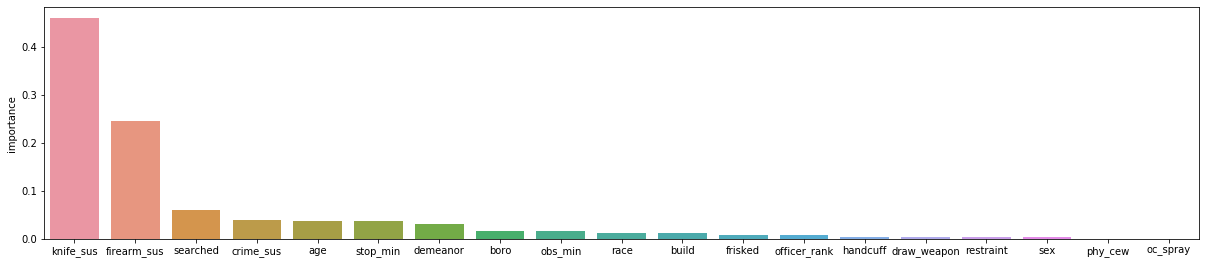

In [21]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.7, 4.27)
sns.barplot(x=feature_importances.index, y="importance", data=feature_importances)